<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/9/95/Continuous_wavelet_transform.gif" alt="Demo of different wavelets matching signals on Wikipedia" />
</p>

# Wavelet Basics

---

## Overview

1. Prerequistites
2. Background
3. Load Wav File for Audio
4. Fourier Transform - Frequency, but not Time
6. Wavelet Transform - Frequency and Time
7. Wavelet Terminology

## Prerequisites
| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Matplotlib](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html) | Necessary | Plotting on a data |
| [Intro to Pandas](https://foundations.projectpythia.org/core/pandas/pandas.html) | Necessary | Familiarity with working with dataframes |
| [Intro to Numpy](https://foundations.projectpythia.org/core/numpy/numpy-basics.html)| Necessary | Familiarity with working with arrays |
| [Intro to SciPy](https://docs.scipy.org/doc/scipy-1.13.1/tutorial/fft.html) | Helpful | Familiarity with working with wave files and FFT |

- **Time to learn**: 45 minutes

## Background
Time-series data refers to when data is collected over time, making the order of the data collection and not just the value important. For the purpose of an example, imagine a short piece of music. Each note in the piece can be any note from A to G. Each note varies based on frequency to produce different notes. A higher frequency is associated with a higher pitch, like an A note, while a lower frequency is associated with a lower pitch, like a C note.

With tools like Fourier Transform, it will be obvious when a B and a D note appears in the piece of music. However, this does not encapulsate all the information. What is the order? BDDB is very different from DDDDBD. This is the importance of time and order in data that is lost in first passes of signal processing with tools like Fourier Transform. The power of wavelets is that it can return both information about the frequency and information about the time when the frequency occurred.

---

## Imports

In [1]:
import pywt                                 # PyWavelets
import numpy as np                          # working with arrays
import pandas as pd                         # working with dataframes
from scipy.io import wavfile                # loading in wav files
import matplotlib.pyplot as plt             # plot data (fourier transform and wav files)
from scipy.fftpack import fft, fftfreq      # working with Fourier Transforms

---

## Load Wav File for Audio

### Load .wav file data

In [2]:
sample_rate, signal_data = wavfile.read('../data/jingle_bells.wav')

# Determine the total duration and length of .wav file
duration = len(signal_data) / sample_rate
time = np.arange(0, duration, 1/sample_rate) 

In [3]:
print(f"Sample Rate: {sample_rate}")
print(f"duration = {duration} seconds (is the ratio of sample rate and data = {len(signal_data)} / {sample_rate})")
print(f"length of audio file = {len(signal_data)} time steps")

Sample Rate: 10000
duration = 15.6991 seconds (is the ratio of sample rate and data = 156991 / 10000)
length of audio file = 156991 time steps


### Convert .wav file to pandas dataframe

In [4]:
signal_df = pd.DataFrame({'time (seconds)': time, 'amplitude': signal_data})
signal_df.head()

,time (seconds),amplitude
0,0.0000,-417
1,0.0001,-2660
2,0.0002,-2491
3,0.0003,6441
4,0.0004,-8540


### Plot a Small Sample of the .wav File

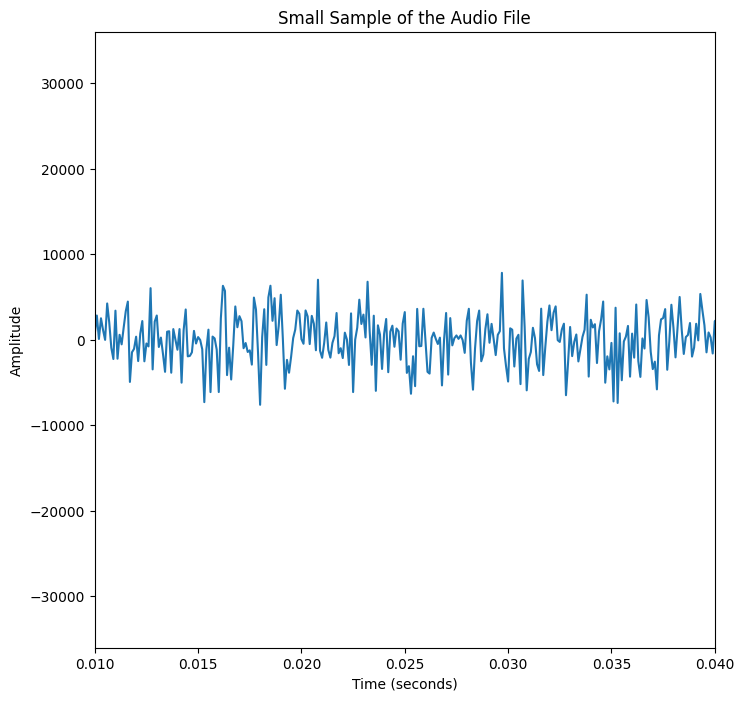

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
fig = plt.plot(signal_df["time (seconds)"], signal_df["amplitude"])
ax.set_xlim(signal_df["time (seconds)"][100], signal_df["time (seconds)"][400])
plt.title("Small Sample of the Audio File")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

In [6]:
# note frequency in hz
a_freq = 440
b_freq = 494
c_freq = 261
d_freq = 293
e_freq = 330
f_freq = 350
g_freq = 392

| Note   | Freq   |
|--------|--------|
| A note | 440 hz |
| B note | 494 hz |
| C note | 261 hz |
| D note | 293 hz |
| E note | 330 hz |
| F note | 350 hz |
| G note | 392 hz |

## Fourier Transform - Frequency, but not Time

### Advantages (and Disadvantages) of Fourier Transform

The first step of processing new data includes developing a basic understanding of the kinds of frequencies that are present. Are there prevailing patterns? Is one frequency more dominant? How much of the dominant frequencies overcome background noise?

Fourier Transform is a tool that can be used to pull out frequencies from raw data. For a musical example, a Fourier Transform will return the frequencies of all the notes that are present. Jingle Bells is a simple muiscal piece that is taught to beginners and children since it can be entirely played with one hand: 

```
"Jingle Bells, Jingle Bells, Jingle All the Way" as EEE EEE EGCDE
```

### Fast Fourier Transform of Signal Data

In [7]:
fourier_transform = abs(fft(signal_data))
freqs = fftfreq(len(fourier_transform), (1/sample_rate))

### Plot Frequency Prevalence from Fast Fourier Transform

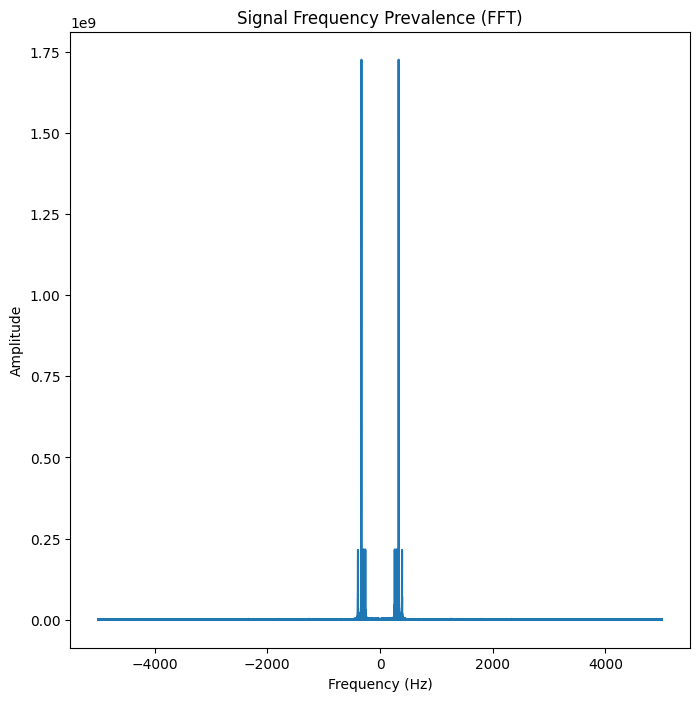

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(freqs, fourier_transform)
plt.title("Signal Frequency Prevalence (FFT)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

### Only plot positive Frequencies (hz) in range of notes (200-500)

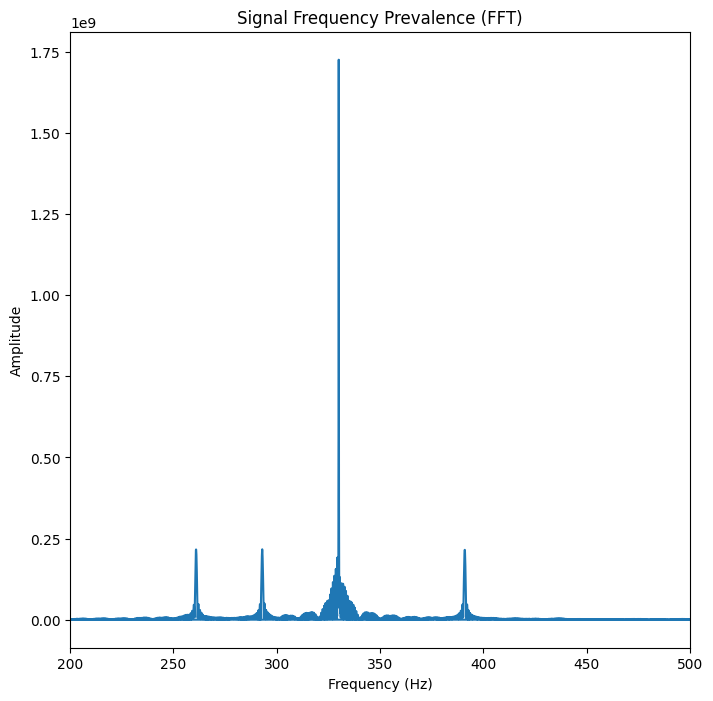

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(freqs, fourier_transform)
ax.set_xlim(left=200, right=500) 
plt.title("Signal Frequency Prevalence (FFT)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

### Plot Fast Fourier Transform for Frequency Prevalence with Frequency of Notes

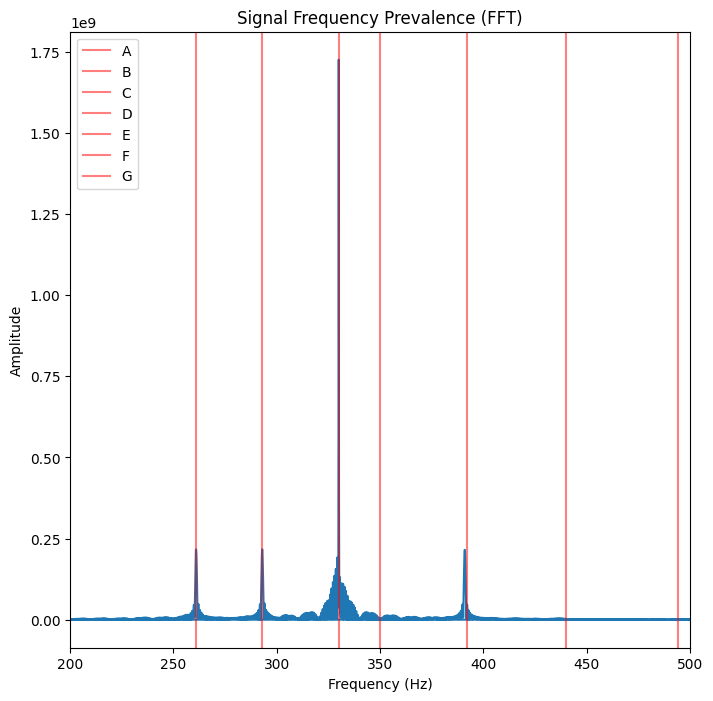

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(freqs, fourier_transform)
ax.set_xlim(left=200, right=500) 
plt.axvline(x=a_freq, color="red", label="A",alpha=0.5) # A note: 440 hz
plt.axvline(x=b_freq, color="red", label="B",alpha=0.5) # B Note: 494 hz
plt.axvline(x=c_freq, color="red", label="C",alpha=0.5) # C Note: 261 hz
plt.axvline(x=d_freq, color="red", label="D",alpha=0.5) # D Note: 293 hz
plt.axvline(x=e_freq, color="red", label="E",alpha=0.5) # E Note: 330 hz
plt.axvline(x=f_freq, color="red", label="F",alpha=0.5) # F Note: 350 hz
plt.axvline(x=g_freq, color="red", label="G",alpha=0.5) # G Note: 392 hz
plt.title("Signal Frequency Prevalence (FFT)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

### Fast Fourier Transform Predicts Four Notes

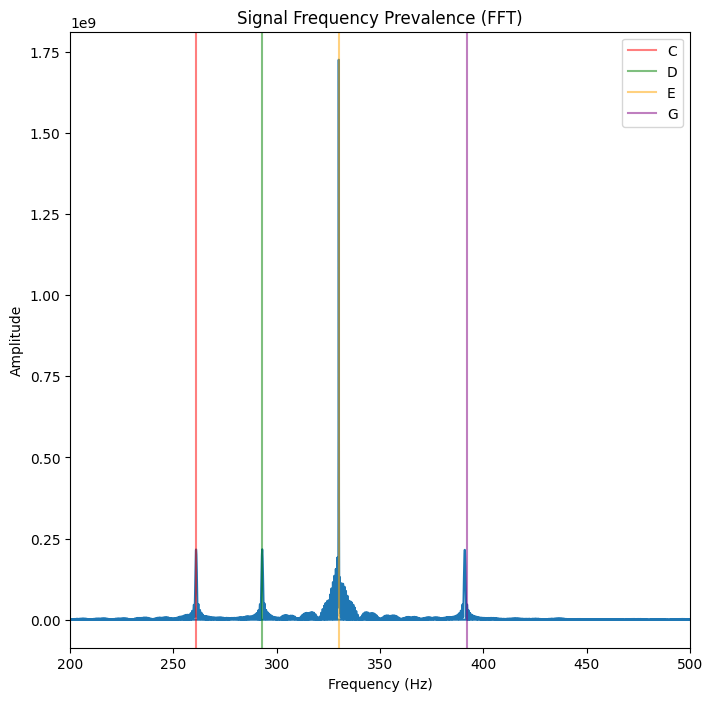

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(freqs, fourier_transform)
ax.set_xlim(left=200, right=500) 
plt.axvline(x=c_freq, color="red", label="C",alpha=0.5) # C Note: 261 hz
plt.axvline(x=d_freq, color="green", label="D",alpha=0.5) # D Note: 293 hz
plt.axvline(x=e_freq, color="orange", label="E",alpha=0.5) # E Note: 330 hz
plt.axvline(x=g_freq, color="purple", label="G",alpha=0.5) # G Note: 391 hz
plt.title("Signal Frequency Prevalence (FFT)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

### Now What?

Fourier Transform has been able to illustrate that there are four notes: C, D, E, and G. But what order are the notes in? And how frequently is each note used? Fourier Transform can only give information about the frequency and a ratio of how prevelant a note is (for example, in Jingle Bells, E is significantly more common than any other note).

But to determine **both** frequency **and** time, you'll need a different tool: **wavelet**

## Wavelet Transform - Frequency and Time

### What is a Wavelet

A wavelet is a short wave-like oscillation that averages out to zero.

> Many signals and images of interest exhibit piecewise smooth behavior punctuated by transients. Speech signals are characterized by short bursts encoding consonants followed by steady-state oscillations indicative of vowels. Natural images have edges. Financial time series exhibit transient behavior, which characterize rapid upturns and downturns in economic conditions. Unlike the Fourier basis, wavelet bases are adept at sparsely representing piecewise regular signals and images, which include transient behavior.
> 
> [Mathworks](https://www.mathworks.com/help/wavelet/gs/what-is-a-wavelet.html): "What is a Wavelet"

Fourier transforms is made up of sine waves of different and various frequencies to best match a signal. However, while Fourier transforms can be used to match frequency, information about when each frequency occurs in the signal is lost. This can be overcome with wavelet analysis. A wavelet scales (expanded or shrunk) different shaped wavelets and is shifted along the signal. The scaled wavelet is shifted along the signal, which allows for a signal's frequency at each time step to be determined. 

## Wavelet Terminology

## Wavelet Inputs

- x: Input time-series data (for example: musical note frequency over time)
- wavelet: name of the mother wavelet
- dt: sampling period/rate (time between each y-value)
- s0: smallest scale
- dj: spacing between each scale
- jtot: largest scale

### Time-Series Data

Time-series data is data recorded over known intervals of time. For example, time-series data for weather might track temperature every hour or every month.

### Mother Wavelet
Wavelets are a powerful tool for signal and time-series data. While Fourier Transforms are a common method of signal analysis, they only return the information about the frequency of the signal and not when the frequencies occur or their duration. Due to Heisenberg's Uncertainty Principle, it is impossible to know both the exact frequency and the exact time that the frequency occurs in a signal. Wavelet transform provide a solution for returning both the frequency and time by reducing the precision of the frequency.

While a Fourier Transform uses various sine waves to match possible frequencies in a signal, a wavelet is a short wave of with various shapes to match possible frequencies and frequency ranges. A wavelet is a small wave over a finite length of time. There are many possible wavelet forms to use. Each type of wavelet is sensitive to a range of possible signals.

If a wavelet is made to match the the frequency of an A note for the duration of a second, then it would be possible to match any A notes present in the musical notes that last at least one second.

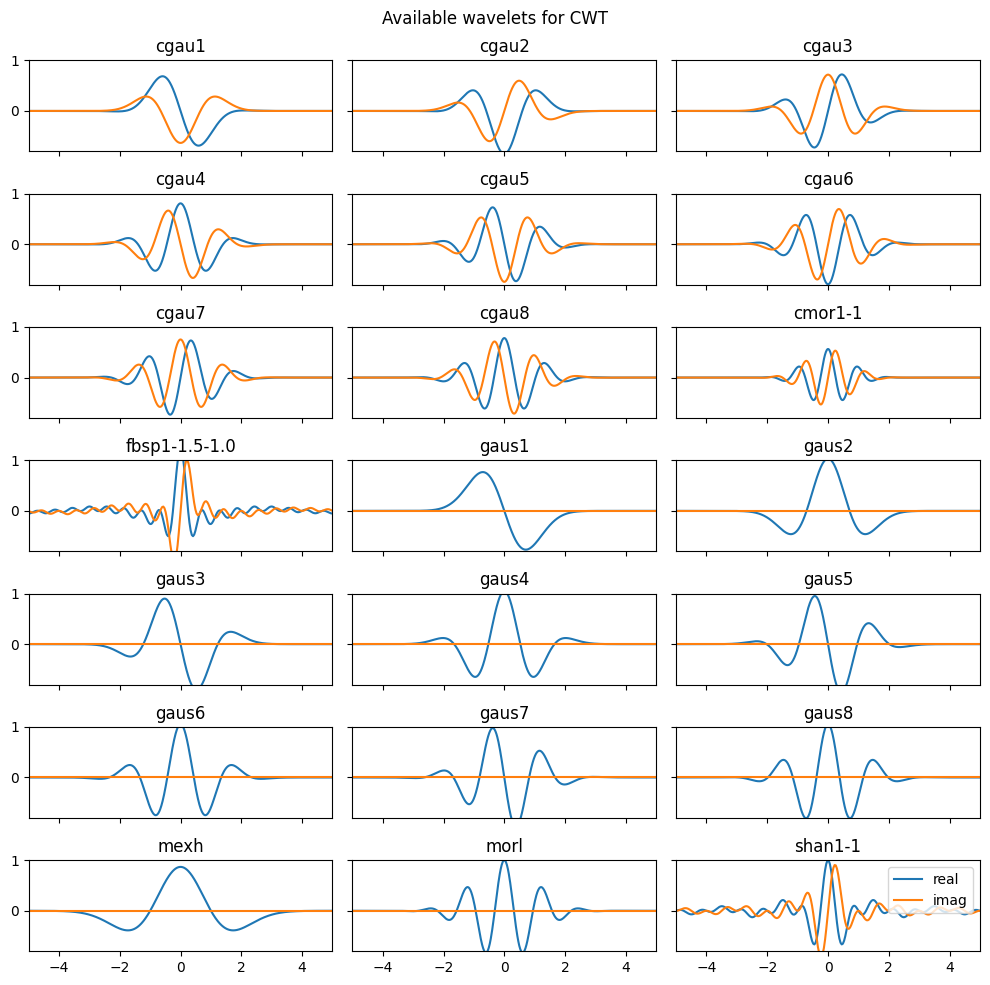

In [12]:
# https://pywavelets.readthedocs.io/en/latest/ref/cwt.html
wavlist = pywt.wavelist(kind="continuous")
cols = 3
rows = (len(wavlist) + cols - 1) // cols
fig, axs = plt.subplots(rows, cols, figsize=(10, 10),
                        sharex=True, sharey=True)
for ax, wavelet in zip(axs.flatten(), wavlist):
    # A few wavelet families require parameters in the string name
    if wavelet in ['cmor', 'shan']:
        wavelet += '1-1'
    elif wavelet == 'fbsp':
        wavelet += '1-1.5-1.0'

    [psi, x] = pywt.ContinuousWavelet(wavelet).wavefun(10)
    ax.plot(x, np.real(psi), label="real")
    ax.plot(x, np.imag(psi), label="imag")
    ax.set_title(wavelet)
    ax.set_xlim([-5, 5])
    ax.set_ylim([-0.8, 1])

ax.legend(loc="upper right")
plt.suptitle("Available wavelets for CWT")
plt.tight_layout()
plt.show()

### Daughter Wavelet

A mother wavelet represents the basic wavelet shape that is transformed into varied scaled copies known as daughter wavelets. The daughter wavelets are shifted along the entire signal to match possible frequencies over a finite period of time.

### Sampling Period

The sampling period (matching the sample rate in audio) is hertz when measuring in seconds.

### Scales

Wavelet matches various frequencies by stretching and shrinking the mother wavelet based on a range of possible scales.

- Stretched Wavelet: A large wavelet will capture large features, low frequencies, slow S frequencies
- Shrunk Wavelet: A small wavelet will capture small features and high frequencies, sudden changing frequencies

### Continuous Wavelet Transform (CWT) vs. Discrete Wavelet Transform (DWT)

There are two classes of wavelets: continuous and discrete wavelet transforms. 

The continuous wavelet transform (CWT) are useful when working with time-frequency data and working with changing frequencies. From [MathWorks](https://www.mathworks.com/discovery/wavelet-transforms.html):

> Analyzing a hyperbolic chirp signal (left) with two components that vary over time in MATLAB. The short-time Fourier transform (center) does not clearly distinguish the instantaneous frequencies, but the continuous wavelet transform (right) accurately captures them

<p align="center">
  <img src="https://www.mathworks.com/discovery/wavelet-transforms/_jcr_content/mainParsys/image.adapt.full.medium.jpg/1718282330785.jpg" alt="MathWorks CWT example" />
</p>

Discrete wavelets transforms (DWT) are useful when working with images for tasks like denoising or compressing an image while preserving important details.

<p align="center">
  <img src="https://www.mathworks.com/discovery/wavelet-transforms/_jcr_content/mainParsys/image_196046262.adapt.full.medium.jpg/1718282330795.jpg" alt="MathWorks denoising image" />
</p>

---

## Summary
Add one final `---` marking the end of your body of content, and then conclude with a brief single paragraph summarizing at a high level the key pieces that were learned and how they tied to your objectives. Look to reiterate what the most important takeaways were.

### What's next?
Let Jupyter book tie this to the next (sequential) piece of content that people could move on to down below and in the sidebar. However, if this page uniquely enables your reader to tackle other nonsequential concepts throughout this book, or even external content, link to it here!

## Resources and references
 - [MathWorks Wavelet Transforms](https://www.mathworks.com/discovery/wavelet-transforms.html)
 - [MathWorks: "What is a Wavelet"](https://www.mathworks.com/help/wavelet/gs/what-is-a-wavelet.html)
 